<font size='6' color='blue'><b>ch05. 함수</b></font>

- 반복해서 사용할 코드를 묶어서 구현해 놓은 것
- 같은 이름의 함수는 덮어씀(오버로딩 불가)
- 함수 정의(구현)
    ```
    def 함수명([인수1, 인수2, ...]):
        명령어1
        명령어2
        ...
    
    ```

# **1절 함수의 정의 및 사용(호출)**
## **1.1 함수 정의**

In [1]:
def my_hello(x, msg): # 함수정의
    for i in range(x):
        print(i, msg)

In [2]:
my_hello(4, '쉬는 시간입니다')

0 쉬는 시간입니다
1 쉬는 시간입니다
2 쉬는 시간입니다
3 쉬는 시간입니다


In [5]:
# 함수형 언어인 python, javascript에서 함수는 변수다.
type(my_hello)

function

In [6]:
my_hello = 10
type(my_hello)

int

In [11]:
# 오버로딩이 지원X. 덮어쓰기됨
def my_hello(x): # 함수정의
    for i in range(x):
        print(i, "함수는 복습 필수")

In [10]:
my_hello(4, '쉬는 시간')

TypeError: my_hello() takes 1 positional argument but 2 were given

In [15]:
def my_add(num1, num2, num3=0): # num3은 기본값을 갖는 인수 (↔ 순서인수)
    
    return num1 + num2 + num3
print(my_add(1, 2, 3))
print(my_add(1, 2))

6
3


In [16]:
# 이렇게는 불가
# def my_add(num1, num2=0, num3): # num3은 기본값을 갖는 인수 (↔ 순서인수)    
#     return num1 + num2 + num3
# print(my_add(1, 2, 3))
# print(my_add(1, 2))

## **1.2 docstring 함수 도움말**
- 함수 도움말 (shift+tab로 볼 수 있음)

In [17]:
def fibonacci(n):
    """
    매개변수로 들어온 n값 미만의 피보나치 수열을 출력하는 함수
    ex. 인수로 10 : 0, 1, 1, 2, 3, 5, 8
    ex. 인수로 5 : 0, 1, 1, 2, 3, 5
    """
    a, b = 0, 1 # 내부적으로 튜플됨 (a, b) = (0, 1)
    while a < n:
        print(a, end=". ")
        a, b = b, a+b
    print() # 개행

In [18]:
fibonacci(100)

0. 1. 1. 2. 3. 5. 8. 13. 21. 34. 55. 89. 


In [19]:
type(fibonacci)

function

In [20]:
fibonacci

<function __main__.fibonacci(n)>

In [21]:
__name__

'__main__'

In [22]:
if __name__ == '__main__':
    fibonacci(100)

0. 1. 1. 2. 3. 5. 8. 13. 21. 34. 55. 89. 


Home에서 New File 생성 > fibonacci.py<br>
<br>
코드 작성><br>
    def fibonacci(n):<br>
    매개변수로 들어온 n값 미만의 피보나치 수열을 출력하는 함수<br>
    ex. 인수로 10 : 0, 1, 1, 2, 3, 5, 8<br>
    ex. 인수로 5 : 0, 1, 1, 2, 3, 5<br>
    <br>
    a, b = 0, 1 # 내부적으로 튜플됨 (a, b) = (0, 1)<br>
    while a < n:<br>
        print(a, end=". ")<br>
        a, b = b, a+b<br>
    print() # 개행<br>
<br>
Anaconda Prompt 실행 > 아래와 같이 코드 작성하면 실행 가능<br>
마지막엔 exit 해서 나옴<br>

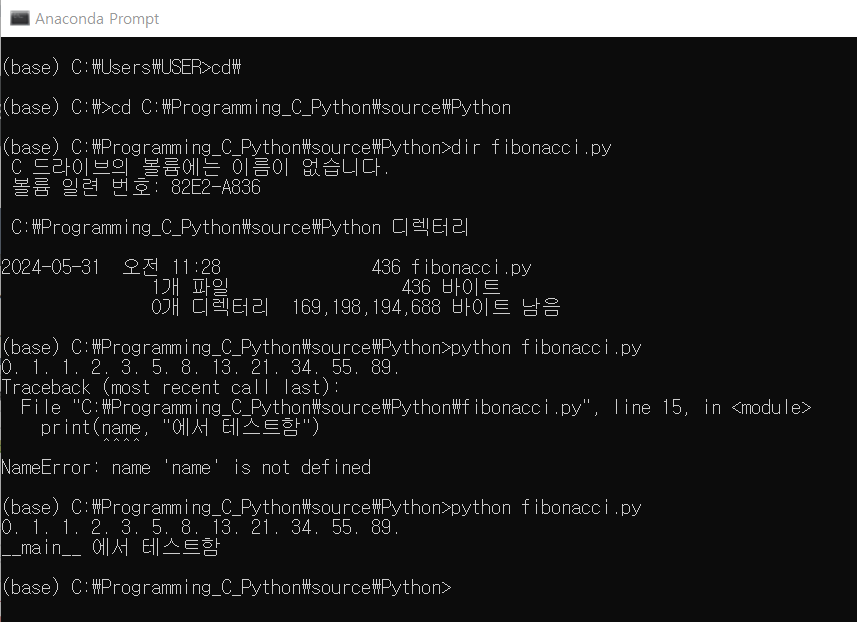

In [25]:
import fibonacci as fibo # fibonacci.py가 해석돼서 메모리 로드

In [24]:
fibonacci.fibonacci(100)

0. 1. 1. 2. 3. 5. 8. 13. 21. 34. 55. 89. 


**fibonacci.fibonacci( + shift + tab**
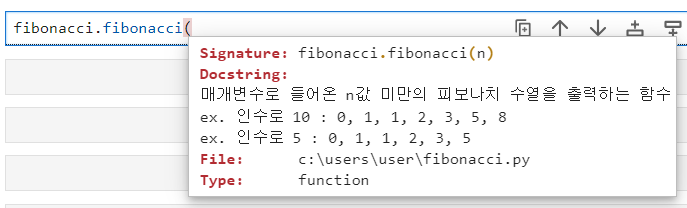

## **1.3 지역변수(local var)와 전역변수(global var)**

In [30]:
global_var = 100 # 전역변수
def func1():
    print(global_var)
func1()
print(global_var)

100
100


In [31]:
def func2():
    local_var = 100 # 지역변수 : 함수 내에서만 사용 가능한 변수
    print(local_var)
func2()

100


In [32]:
local_var

NameError: name 'local_var' is not defined

In [34]:
g_var = 100 # 전역변수
def func3():
    g_var = 200 # 지역변수
    print(g_var)
func3()

200


In [35]:
g_var

100

In [37]:
g_var = 100 # 전역변수
def func3():
    print(g_var)
    g_var = 200 # 지역변수 선언
    print(g_var)
func3()

UnboundLocalError: cannot access local variable 'g_var' where it is not associated with a value

차례대로 컴파일X, 선언문부터 컴파일<br>
아직 g_var가 로컬변수에 할당되지 않아서 오류냄<br>
=> UnboundLocalError : cannot access local variable 'g_var' where it is not associate with a value

## **1.5 전역변수 수정 : global**

In [157]:
g_var = 100 # 전역변수
def func3():
    global g_var # 함수 내에서의 g_var는 전역변수를 쓸거야
    print(g_var)
    g_var = 200 # 전역변수에 값을 할당
    
func3()
g_var

100


200

## **1.6 값에 의한 호출 (call by value)**
- 함수에 인수로 전달되는 변수가 <b>스칼라 변수(숫자, 문자, 논리)</b>일 경우

In [43]:
foo = 'ab' # 스칼라 변수
id(foo) # 주소 뿌리기!

2416234259248

In [45]:
def func1(f):
    print("Before : {}의 주소는 {}".format(f, id(f)))
    f *= 3 # 매개변수는 지역변수
    print("After : {}의 주소는 {}".format(f, id(f)))
func1(foo)
print("함수 호출 후 foo : {}의 주소는 {}".format(foo, id(foo)))

Before : ab의 주소는 2416234259248
After : ababab의 주소는 2416364646704
함수 호출 후 foo : ab의 주소는 2416234259248


## **1.7 참조에 의한 호출 (call by reference)**
- 함수에 전달되는 인수가 <b>리스트, 딕셔너리, 셋</b>일 경우

In [47]:
L = [1,2,3]
print("L의 내용은 {}, 주소는 {}".format(L, id(L)))

L의 내용은 [1, 2, 3], 주소는 2416363942080


In [48]:
def func2(f):
    print("함수 내 before : L의 내용은 {}, 주소는 {}".format(L, id(L)))
    f.append(4)
    print("함수 내 after : L의 내용은 {}, 주소는 {}".format(L, id(L)))
func2(L)

함수 내 before : L의 내용은 [1, 2, 3], 주소는 2416363942080
함수 내 after : L의 내용은 [1, 2, 3, 4], 주소는 2416363942080


# **2절 함수의 실행결과를 반환하는 return**
- <b>여러 개 값을 반환</b>할 수 있다. (하나의 <b>튜플</b>로 반환)

In [50]:
# 여러값을 return
def swap(a, b):
    return b, a

In [53]:
x, y = 5, 10
print("함수 실행 전 x = {}, y = {}".format(x, y))
x, y = swap(x, y)
print("함수 실행 후 x = {}, y = {}".format(x, y))

함수 실행 전 x = 5, y = 10
함수 실행 후 x = 10, y = 5


# **3절 함수의 매개변수 ★**
## **3.1 기본값을 갖는 매개변수**

In [86]:
def make_url(ip, port = 80): # 키워드 인수 아님)
    # 순서인수, 기본값을 갖는 인수 순으로
    return "http://{}:{}".format(ip, port)

In [87]:
print(make_url("localhost"))
print(make_url("localhost", 8090))
print(make_url("localhost", port = 8090))
print(make_url(port=8090, ip="loalhost"))

http://localhost:80
http://localhost:8090
http://localhost:8090
http://loalhost:8090


## **3.2 튜플 매개변수로 이용한 가변인수 설정**
*가변인수 : 인수개수가 가변

In [63]:
print("Hello", "world") # 인수의 개수가 가변 = 가변인수

Hello world


In [77]:
# args 앞에 *안할 경우
def add(args):
    print("전달받은 args :", args)
    print(type(args))

add((1,2,3)) # 이런식으로 작성해야됨

전달받은 args : (1, 2, 3)
<class 'tuple'>


In [74]:
# args 앞에 * : args가 튜플로 전달 : 튜플매개변수
def add(*args):
    print("전달받은 args :", args)
    print(type(args))
    sum = 0
    for num in args:
        sum += num
    return sum

In [75]:
add(1,2,3)

전달받은 args : (1, 2, 3)
<class 'tuple'>


6

In [76]:
print(add(1,2,3,4,5,6,))
print(add(1))
print(add(1,2))

전달받은 args : (1, 2, 3, 4, 5, 6)
<class 'tuple'>
21
전달받은 args : (1,)
<class 'tuple'>
1
전달받은 args : (1, 2)
<class 'tuple'>
3


In [81]:
def concat(*args, sep):
    return sep.join(args)

In [82]:
concat("C", "Python", "Oracle", "~")
# 어디까지가 *args이고 어디가 sep 구분 어려움 -> 에러

TypeError: concat() missing 1 required keyword-only argument: 'sep'

In [83]:
# 해결책1
concat("C", "python", "Oracle", sep="~")

'C~python~Oracle'

In [84]:
# 해결책2 (강추)☆
def concat(sep, *args): # 순서인수 > 튜플인수
    return sep.join(args)

In [85]:
# sep : "~" / *args : "C", "python", "Oracle"
concat("~", "C", "python", "Oracle")

'C~python~Oracle'

In [89]:
# 해결책3
def concat(*args, sep="/"): # 순서인수 > 튜플인수 > 키워드인수 (순서★)
    return sep.join(args)

In [90]:
concat("C", "python", "Oracle", "~")

'C/python/Oracle/~'

In [91]:
concat("C", "python", "Oracle", sep="~")

'C~python~Oracle'

## **3.3 딕셔너리 매개변수**

In [117]:
def func(args):
    print(args)
    print(type(args))

dic = {'name':'홍길동', 'age':20}
func(dic)

{'name': '홍길동', 'age': 20}
<class 'dict'>


In [114]:
def func(**args): # args가 딕셔너리로 전달
    print(args)
    print(type(args))
    for key, value in args.items():
        print("{}:{}".format(key, value))

In [115]:
dic = {'name':'홍길동', 'age':20}
# func(dic)
func(name='홍길동', age=20)

{'name': '홍길동', 'age': 20}
<class 'dict'>
name:홍길동
age:20


In [116]:
func(gameName="서바이벌C", year=2024, price=33000)

{'gameName': '서바이벌C', 'year': 2024, 'price': 33000}
<class 'dict'>
gameName:서바이벌C
year:2024
price:33000


## **3.4 함수 정의 시 매개변수의 순서**
- 순서인수 > 튜플인수(*) > 키워드인수(매개변수 이름을 명시) > 딕셔너리인수(**)

In [112]:
def func(a, b, c, *d, e=10, **f):
    print('a =', a)
    print('b =', b)
    print('c =', c)
    print('d =', d)
    print('e =', e)
    print('f =', f)

In [113]:
func(10,20,30,1,2,3,4,5, e=100, height=180, name='홍길동',address='서울시')

a = 10
b = 20
c = 30
d = (1, 2, 3, 4, 5)
e = 100
f = {'height': 180, 'name': '홍길동', 'address': '서울시'}


## **3.5 인수의 언패킹**
### **튜플 인수 언패킹**

In [119]:
# args앞에 * : args가 튜플로 전달 : 튜플매개변수
def add(*args): 
    #print("전달받은 args :", args)
    #print(type(args))
    sum = 0
    for num in args:
        sum += num
    return sum

In [120]:
data = (1,2,3) # add((1,2,3))으로 전달되어 에러남
add(data)

TypeError: unsupported operand type(s) for +=: 'int' and 'tuple'

In [124]:
data = (1,2,3) # add(1,2,3) 데이터는 튜플로 전달되어야 하므로 (*data)
add(*data)

6

### **딕셔너리 인수 언패킹**

In [125]:
def func(**args): # args가 딕셔너리로 전달
    #print(args)
    #print(type(args))
    for key, value in args.items():
        print("{} : {}".format(key, value))

In [127]:
dic = {"name":"홍길동", "age":30}
func(dic)

TypeError: func() takes 0 positional arguments but 1 was given

In [128]:
# 딕셔너리 인수 언패킹
dic = {"name":"홍길동", "age":30}
func(**dic)

name : 홍길동
age : 30


# **4절 람다식**
- 람다식은 **작은 익명함수**를 의미함
- 실행할 문장을 **한 문장만 작성**할 수 있음
- **리스트 컴프리헨션**과 같이 참조해서 학습 추천
- ex. <b>map(), filter()</b>에서 사용할 예정

In [130]:
# 일반함수
def add(a, b):
    return a+b
add(3, 5)

8

In [131]:
type(add)

function

In [132]:
# 람다식
add = lambda a, b : a + b

In [133]:
add(5, 5)

10

In [134]:
type(add)

function

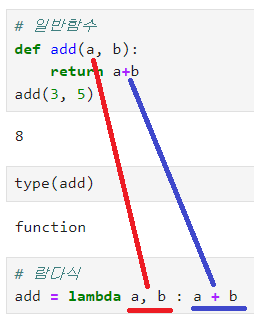

In [135]:
# Q.람다 왜 씀? A.함수의 매개변수로 (lambda a, b : a + b)를 쓰기위해
(lambda a, b : a + b)(5, 6)

11

## **매개변수로 람다식 이용**

In [136]:
# lambda x : x**2 | 변수에 담는 용도 X 매개변수 전달 용도 O
f = lambda x : x**2 
f(3)

9

In [144]:
def map_template(func, L=[]):
    result = []
    for data in L:
        result.append(func(data)) # result.append(data) X
    return result

In [145]:
list_data = [1,2,3,4,5]
map_template(lambda x : x**2, list_data)

[1, 4, 9, 16, 25]

In [146]:
list(map(lambda x:x*2, list_data))

[2, 4, 6, 8, 10]

In [147]:
# list comprehension 이용
[x*2 for x in list_data]

[2, 4, 6, 8, 10]

In [ ]:
list_data = [1,2,3,4,5]

In [148]:
def filter_template(func, L=[]):
    result = []
    for data in L:
        if func(data):
            result.append(data)
    return result

In [149]:
filter_template(lambda x : x%2==0, list_data)


[2, 4]

In [150]:
list(filter(lambda x : x%2==0, list_data))

[2, 4]

In [ ]:
# list comprehension 이용
[x for x in list_data if x%2==0]

# **5절 파이썬 내장함수**
- print처럼 import하지 않고 즉시 사용 가능한 함수

# **연습문제**

1. 함수의 인자로 리스트를 받은 후,<br>
리스트 내에 있는 모든 정수값에 대하여 최대값과 최소값을 return하는<br>
함수 get_max_min(data_list)를 구현하고 호출하시오

In [162]:
num_list = []
num = input("리스트의 값을 입력해주세요 >>")
num_list.append(num)

리스트의 값을 입력해주세요 >> 1


In [163]:
num_list = [1,6,10,80,999,5]
def get_max_min(data_list):
    max_ = max(num_list)
    min_ = min(num_list)
    return min_, max_

In [164]:
get_max_min(num_list)

(1, 999)

2. <b>1~45사이의 로또번호 6개를 반환</b>하는 <b>make_lotto()함수를 정의하고 호출</b>
하시오

In [161]:
import random
lotto_num = []
def make_lotto():
    for i in range(6):
        ran = random.randint(1, 46)
        lotto_num.append(ran)
    return lotto_num
make_lotto()

[31, 6, 9, 40, 43, 28]

3. 369게임은 숫자에 <b>3,6,9가 들어가면 박수를 치고</b>,<br>
<b>나머지는 숫자는 그대로</b> 이야기하는 게임이다.<br>
369게임을 시뮬레이션하는 함수를 정의하라<br>

1단계 : game_369([1,2,3,4,5,6,7,8,9,13,20,33]) <br>
→ 결과 : [1,2, ‘짝’, 4,5, ‘짝’,7,8, ‘짝’, ‘짝’, 20,‘짝짝’] <br>
2단계 : game_369(1,2,3,4,5,6,7,8,9,13,20,33) #튜플인수이용 <br>
→ 결과 : [1,2, ‘짝’, 4,5, ‘짝’,7,8, ‘짝’, ‘짝’, 20,‘짝짝’]

In [ ]:
num = [1,2,3,4,5,6,7,8,9,13,20,33]
def game_369():
    while(num
    if (num=%3%) | (num=%6%) | (num=%9%):
        print('짝')
    else:
        print("{}".format(num))
    